In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from pandarallel import pandarallel
pandarallel.initialize()


INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


# functions

In [2]:
def calculate_mutations(row):
    heavy_mutations = np.sum([row["germline_heavy"][i]!=row["sequence_heavy"][i] for i in range(min(len(row["sequence_heavy"]), len(row["germline_heavy"])))])
    light_mutations = np.sum([row["germline_light"][i]!=row["sequence_light"][i] for i in range(min(len(row["sequence_light"]), len(row["germline_light"])))])
    return heavy_mutations + light_mutations


# data

In [3]:
immunized_sequences = pd.read_pickle("/home/athenes/paratope_clustering/saber/250326/tt_whole_seq/paratope_tt_mutations_sequences.pkl")
immunized_germlines = pd.read_pickle("/home/athenes/paratope_clustering/saber/250326/tt_whole_seq/paratope_tt_mutations_germline.pkl")
naive_sequences = pd.read_pickle("/home/athenes/paratope_clustering/saber/250326/naive_whole_seq/paratope_naive_sequences.pkl")
naive_germlines = pd.read_pickle("/home/athenes/paratope_clustering/saber/250326/naive_whole_seq/paratope_naive_germline.pkl")


In [4]:
immunized_sequences["paratope_size"]=immunized_sequences["model_prediction_heavy"].apply(lambda x:np.sum(x))+immunized_sequences["model_prediction_light"].apply(lambda x:np.sum(x))
immunized_sequences["normalized_paratope_size"]=immunized_sequences["paratope_size"]/(immunized_sequences.sequence_heavy.str.len()+immunized_sequences.sequence_light.str.len())
naive_sequences["paratope_size"]=naive_sequences["model_prediction_heavy"].apply(lambda x:np.sum(x))+naive_sequences["model_prediction_light"].apply(lambda x:np.sum(x))
naive_sequences["normalized_paratope_size"]=naive_sequences["paratope_size"]/(naive_sequences.sequence_heavy.str.len()+naive_sequences.sequence_light.str.len())

In [5]:
naive_sequences["paratope_size"]=naive_sequences["model_prediction_heavy"].apply(lambda x:np.sum(x))+naive_sequences["model_prediction_light"].apply(lambda x:np.sum(x))
naive_sequences["normalized_paratope_size"]=naive_sequences["paratope_size"]/(naive_sequences.sequence_heavy.str.len()+naive_sequences.sequence_light.str.len())

In [6]:
naive_germlines["paratope_size"]=naive_germlines["model_prediction_heavy"].apply(lambda x:np.sum(x))+naive_germlines["model_prediction_light"].apply(lambda x:np.sum(x))
naive_germlines["normalized_paratope_size"]=naive_germlines["paratope_size"]/(naive_germlines.sequence_heavy.str.len()+naive_germlines.sequence_light.str.len())

In [7]:
immunized_sequences["paratope_size"]=immunized_sequences["model_prediction_heavy"].apply(lambda x:np.sum(x))+immunized_sequences["model_prediction_light"].apply(lambda x:np.sum(x))
immunized_sequences["normalized_paratope_size"]=immunized_sequences["paratope_size"]/(immunized_sequences.sequence_heavy.str.len()+immunized_sequences.sequence_light.str.len())

In [8]:
immunized_germlines["paratope_size"]=immunized_germlines["model_prediction_heavy"].apply(lambda x:np.sum(x))+immunized_germlines["model_prediction_light"].apply(lambda x:np.sum(x))
immunized_germlines["normalized_paratope_size"]=immunized_germlines["paratope_size"]/(immunized_germlines.sequence_heavy.str.len()+immunized_germlines.sequence_light.str.len())

In [9]:
immunized_sequences["germline_heavy"]=immunized_germlines["sequence_heavy"]
immunized_sequences["germline_light"]=immunized_germlines["sequence_light"]


In [10]:
naive_sequences["germline_heavy"]=naive_germlines["sequence_heavy"]
naive_sequences["germline_light"]=naive_germlines["sequence_light"]


In [11]:
immunized_sequences["mutation_count"]=immunized_sequences.apply(calculate_mutations, axis=1)
naive_sequences["mutation_count"]=naive_sequences.apply(calculate_mutations, axis=1)

In [12]:
immunized_sequences["clone_size"] = immunized_sequences.groupby("family")["family"].transform("count")


In [13]:
naive_sequences["clone_size"] = naive_sequences.groupby("family")["family"].transform("count")


In [14]:
print(len(immunized_sequences.query("clone_size>1"))/len(immunized_sequences))

0.920863309352518


In [15]:
print(len(naive_sequences.query("clone_size>1"))/len(naive_sequences))

0.10285220397579949


In [16]:
print(naive_sequences["germline_heavy"])

0       QVQLQQPGAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGQGLE...
1       EVQLQQSGPELVKPGASVKIPCKASGYTFTDYNMDWVKQSHGKSLE...
2       QVQLQQSGPELVKPGASVKISCKASGYSFTSYYIHWVKQRPGQGLE...
3       EFQLQQSGPELVKPGASVKMSCKASGYTFTSYVMHWVKQKPGQGLE...
4       QVQLQQSGAELMKPGASVKLSCKATGYTFTGYWIEWVKQRPGHGLE...
                              ...                        
1152    EVKLVESGGGLVQPGGSLRLSCATSGFTFTDYYMSWVRQPPGKALE...
1153    EVKLVESGGGLVQPGGSLRLSCATSGFTFTDYYMSWVRQPPGKALE...
1154    EVQLVESGGGLVQPKGSLKLSCAASGFTFNTYAMNWVRQAPGKGLE...
1155    EVQLVESGGGLVQPKGSLKLSCAASVFTFNTYAMHWVCQAPGKGLE...
1156    LVKTGASVKISCKASGYSFTGYYMHWVKQSHGKSLEWIGYISCYNG...
Name: germline_heavy, Length: 1157, dtype: object


# results

In [17]:
plt.rcParams.update({
    "axes.titlesize": 38,
    "axes.labelsize": 35,
    "xtick.labelsize": 32,
    "ytick.labelsize": 32,
    "legend.fontsize": 33,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})
FONT=28

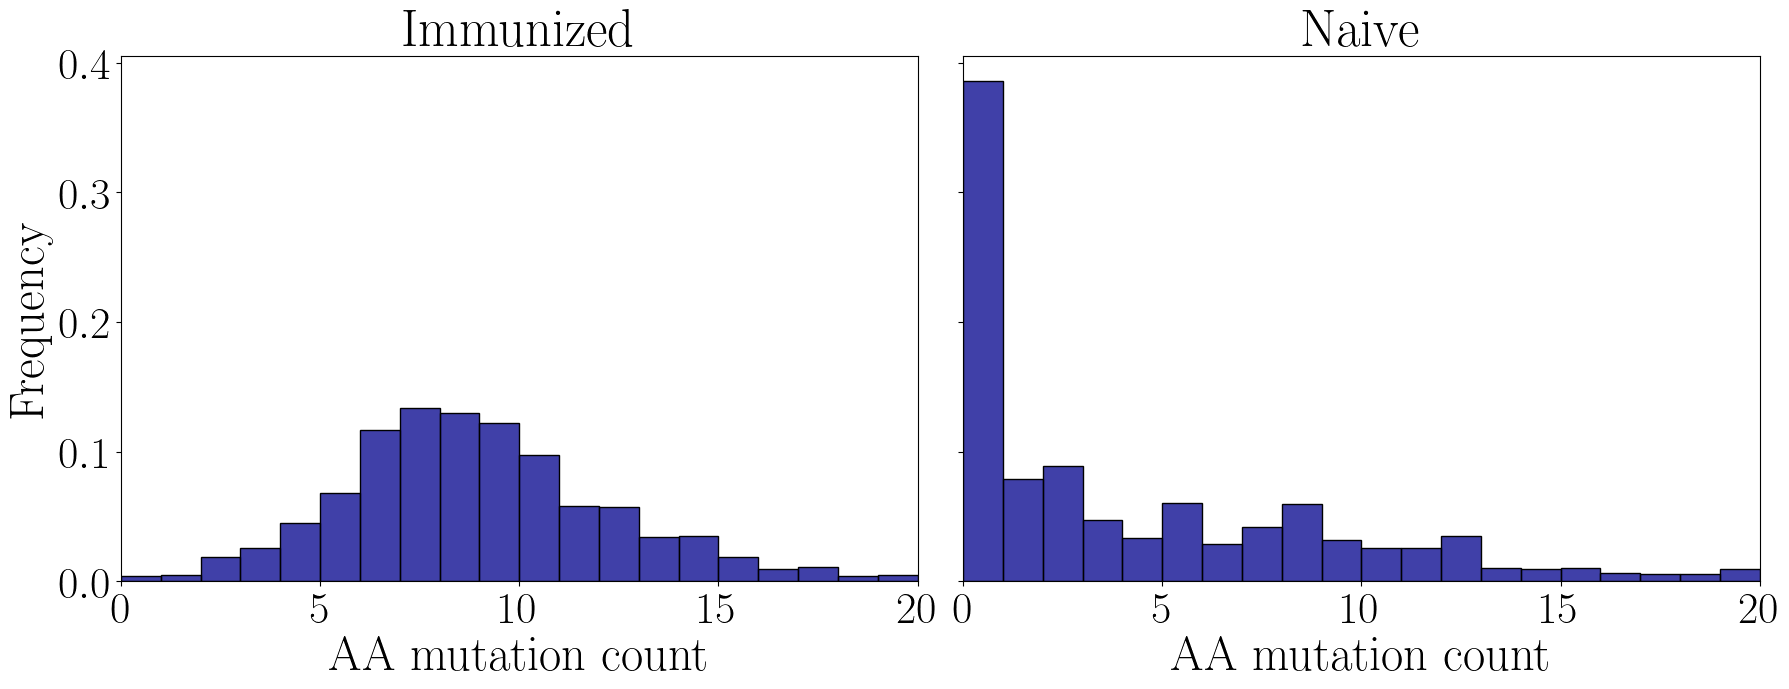

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Left subplot: Immunized
sns.histplot(
    immunized_sequences.query("mutation_count < 21"),
    x="mutation_count",
    bins=20,
    stat="density",
    color="darkblue",
    ax=axs[0]
)
axs[0].set_title("Immunized")
axs[0].set_xlabel("AA mutation count")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim([0, 20])

# Right subplot: Naive
sns.histplot(
    naive_sequences.query("mutation_count < 21"),
    x="mutation_count",
    bins=20,
    stat="density",
    color="darkblue",
    ax=axs[1]
)
axs[1].set_title("Naive")
axs[1].set_xlabel("AA mutation count")
axs[1].set_xlim([0, 20])

# Adjust layout and save
plt.tight_layout()
plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/si_figure5.png", bbox_inches='tight', dpi=300)
plt.show()
